In [1]:
#!/usr/bin/env python3

In [2]:
import sys
import random

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=80)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
from splay_operation import Tree

naive = False

In [5]:
class BenchmarkingTree(Tree):
    """ A modified Splay tree for benchmarking.
    We inherit the implementation of operations from the Tree class
    and extend it by keeping statistics on the number of splay operations
    and the total number of rotations. Also, if naive is turned on,
    splay uses only single rotations.
    """
    def __init__(self, naive=False):
        Tree.__init__(self)
        self.do_naive = naive
        self.reset()
    def reset(self):
        """Reset statistics."""
        self.num_rotations = 0;
        self.num_operations = 0;
    def rotate(self, node):
        self.num_rotations += 1
        Tree.rotate(self, node)
    def splay(self, node):
        self.num_operations += 1
        if self.do_naive:
            while node.parent is not None:
                self.rotate(node)
        else:
            Tree.splay(self, node)
    def rot_per_op(self):
        """Return the average number of rotations per operation."""
        if self.num_operations > 0:
            return self.num_rotations / self.num_operations
        else:
            return 0

In [6]:
def make_progression(seq, A, B, s, inc):
    """An auxiliary function for constructing arithmetic progressions.
    The array seq will be modified to contain an arithmetic progression
    of elements in interval [A,B] starting from position s with step inc.
    """
    for i in range(len(seq)):
        while seq[i] >= A and seq[i] <= B and s + inc*(seq[i]-A) != i:
            pos = s + inc*(seq[i]-A)
            seq[i], seq[pos] = seq[pos], seq[i]

In [7]:
def test_sequential(naive):
    ns = []
    rotations_per_op = []
    for n in range(100, 3001, 100):
        tree = BenchmarkingTree(naive)
        for elem in range(n):
            tree.insert(elem)
        for _ in range(5):
            for elem in range(n):
                tree.lookup(elem)
        
        ns.append(n)
        rotations_per_op.append(tree.rot_per_op())
        print(n, tree.rot_per_op())
    return ns, rotations_per_op

In [8]:
def test_random(naive):
    ns = []
    rotations_per_op = []
    for exp in range(32, 64):
        n = int(2**(exp/4))
        tree = BenchmarkingTree(naive)
        for elem in random.sample(range(n), n):
            tree.insert(elem)
        for _ in range(5*n):
            tree.lookup(random.randrange(n))
        ns.append(n)
        rotations_per_op.append(tree.rot_per_op())
        print(n, tree.rot_per_op())
    return ns, rotations_per_op

In [9]:
def test_subset(naive):
    subs, ns, rotations_per_op  = [], [], []
    
    for sub in [10, 100, 1000]:
        for exp in range(32,64):
            n = int(2**(exp/4))
            if n < sub:
                continue

            # We will insert elements in order, which contain several
            # arithmetic progressions interspersed with random elements.
            seq = random.sample(range(n), n)
            make_progression(seq, n//4, n//4 + n//20, n//10, 1)
            make_progression(seq, n//2, n//2 + n//20, n//10, -1)
            make_progression(seq, 3*n//4, 3*n//4 + n//20, n//2, -4)
            make_progression(seq, 17*n//20, 17*n//20 + n//20, 2*n//5, 5)
            tree = BenchmarkingTree(naive)
            for elem in seq:
                tree.insert(elem)
            tree.reset()
            for _ in range(10000):
                tree.lookup(seq[random.randrange(sub)])
            print(sub, n, tree.rot_per_op())
            subs.append(sub)
            ns.append(n)
            rotations_per_op.append(tree.rot_per_op())
    
    return subs, ns, rotations_per_op

In [10]:
tests = {
    "sequential": test_sequential,
    "random": test_random,
    "subset": test_subset,
}

In [11]:
def run_experiment(test, sid, implementation):
    test, student_id = test, sid
    if implementation == "std":
        naive = False
    elif implementation == "naive":
        naive = True
    else:
        raise ValueError("Last argument must be either 'std' or 'naive'")
    random.seed(student_id)
    if test in tests:
        return tests[test](naive)
    else:
        raise ValueError("Unknown test {}".format(test))
    # Part of another conditional
    #raise ValueError("Usage: {} <test> <student-id> (std|naive)".format(test))

In [12]:
# Macros
sid = 73
standard = "std"
naive_v = "naive"
seq_test = "sequential"
ran_test = "random"
sub_test = "subset"

### Sequential Test

In [13]:
# Run sequential tests

seq_std_n, seq_std_rot = run_experiment(seq_test, sid, standard)
seq_n_n, seq_n_rot = run_experiment(seq_test, sid, naive_v)



100 3.637729549248748
200 3.6688907422852375
300 3.7515286270150083
400 3.7761567319716547
500 3.790930310103368
600 3.8063350930814117
700 3.798285306025244
800 3.802667222337987
900 3.8097795888127433
1000 3.8121353558926487
1100 3.83830883467192
1200 3.826781497430199
1300 3.829849980766765
1400 3.8300988212882485
1500 3.833648183131459
1600 3.8252943014897385
1700 3.8306696734974017
1800 3.8298916566348735
1900 3.8353364330204402
2000 3.835236269689141
2100 3.8303833637590285
2200 3.8335479960603074
2300 3.8349880426117835
2400 3.835613584276686
2500 3.8315221014734315
2600 3.831591768703122
2700 3.8365948515340453
2800 3.8358830882790644
2900 3.8375193976665325
3000 3.8329351630646147
100 42.31051752921536
200 83.98165137614679
300 125.64980544747081
400 167.31721550646103
500 208.98432810936978
600 250.65129202556267
700 292.3181709930936
800 333.98499687434884
900 375.65178736803114
1000 417.318553092182
1100 458.985300803152
1200 500.6520350048618
1300 542.3187588152327
1400 58

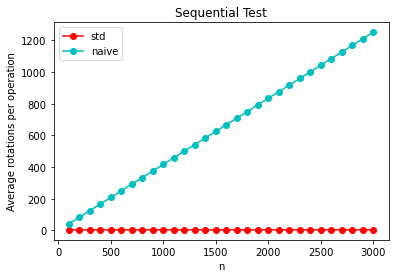

In [14]:
# Plotting sequential test
plt.plot(seq_std_n, seq_std_rot, marker='o', color='r', label=standard)
plt.plot(seq_n_n, seq_n_rot, marker='o', color='c', label=naive_v)
plt.title("Sequential Test")
plt.xlabel("n")
plt.ylabel("Average rotations per operation")
plt.legend()

plt.savefig('SequentialGraph.png', bbox_inches='tight')

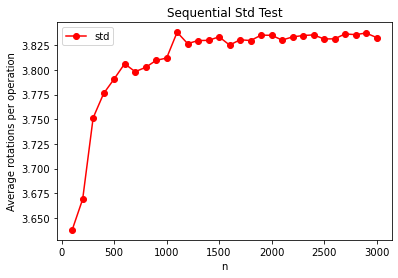

In [30]:
# Plotting sequential test
plt.plot(seq_std_n, seq_std_rot, marker='o', color='r', label=standard)
plt.title("Sequential Std Test")
plt.xlabel("n")
plt.ylabel("Average rotations per operation")
plt.legend()

plt.savefig('SequentialSTDGraph.png', bbox_inches='tight')

### Random Test

In [15]:
# Run Random tests
ran_std_n, ran_std_rot = run_experiment(ran_test, sid, standard)
ran_n_n, ran_n_rot = run_experiment(ran_test, sid, naive_v)


256 8.549837133550488
304 8.968184311574328
362 9.367111929986182
430 9.700659170221016
512 10.067730380983393
608 10.29805319440636
724 10.702509785862308
861 11.11810261374637
1024 11.472244831515546
1217 11.910012327078482
1448 12.179693795326349
1722 12.5497047720453
2048 12.930983966794173
2435 13.277021014443152
2896 13.642647482014388
3444 13.965687460678508
4096 14.401139369277722
4870 14.716725418392143
5792 15.081666714626918
6888 15.441430541776562
8192 15.829077740025635
9741 16.194815638634612
11585 16.54559841171647
13777 16.920663916478144
16384 17.253023814125715
19483 17.62982796821133
23170 17.98082276523353
27554 18.352346618437846
32768 18.71289933725656
38967 19.08241196573154
46340 19.437787504630645
55108 19.81214709342592
256 8.271009771986972
304 8.638507953922106
362 9.045601105481346
430 9.390461419154711
512 9.704005210029306
608 9.946257197696736
724 10.334791618696753
861 10.698354307841239
1024 11.083184111997396
1217 11.434461032735241
1448 11.7356970185

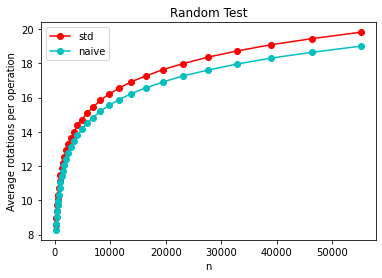

In [16]:
# Graph random test
# Plotting graph
# Standard plot
plt.plot(ran_std_n, ran_std_rot, marker='o', color='r', label=standard)
plt.plot(ran_n_n, ran_n_rot, marker='o', color='c', label=naive_v)
plt.plot()
plt.title("Random Test")
plt.xlabel("n")
plt.ylabel("Average rotations per operation")
plt.legend()

plt.savefig('RandomGraph.png', bbox_inches='tight')

### Subset Test

In [17]:
# Run Subset Tests
sub_std_sub, sub_std_n, sub_std_rot = run_experiment(sub_test, sid, standard)
sub_n_sub, sub_n_n, sub_n_rot = run_experiment(sub_test, sid, naive_v)


10 256 2.4842
10 304 2.4942
10 362 2.5368
10 430 2.5388
10 512 2.5044
10 608 2.4992
10 724 2.5373
10 861 2.5091
10 1024 2.5126
10 1217 2.5149
10 1448 2.5195
10 1722 2.5227
10 2048 2.5032
10 2435 2.532
10 2896 2.5207
10 3444 2.5239
10 4096 2.5116
10 4870 2.5297
10 5792 2.5204
10 6888 2.5002
10 8192 2.4897
10 9741 2.5
10 11585 2.5311
10 13777 2.533
10 16384 2.5318
10 19483 2.5073
10 23170 2.5042
10 27554 2.5303
10 32768 2.5015
10 38967 2.5137
10 46340 2.5045
10 55108 2.5172
100 256 6.7199
100 304 6.7422
100 362 6.7295
100 430 6.7436
100 512 6.7235
100 608 6.7116
100 724 6.7014
100 861 6.7317
100 1024 6.7304
100 1217 6.7644
100 1448 6.8032
100 1722 6.7875
100 2048 6.7284
100 2435 6.7939
100 2896 6.7686
100 3444 6.7874
100 4096 6.7406
100 4870 6.7954
100 5792 6.7579
100 6888 6.7758
100 8192 6.8077
100 9741 6.7669
100 11585 6.7985
100 13777 6.8129
100 16384 6.8247
100 19483 6.7728
100 23170 6.8659
100 27554 6.7881
100 32768 6.768
100 38967 6.8074
100 46340 6.8353
100 55108 6.8576
1000 1024 

In [18]:
# Process test into specific subsets
sub10_std_n, sub10_std_rot = [], []
sub10_n_n, sub10_n_rot = [], []

sub100_std_n, sub100_std_rot = [], []
sub100_n_n, sub100_n_rot = [], []

sub1000_std_n, sub1000_std_rot = [], []
sub1000_n_n, sub1000_n_rot = [], []

for i in range(len(sub_std_sub)):
    
    if (sub_std_sub[i] == 10):
        sub10_std_n.append(sub_std_n[i])
        sub10_std_rot.append(sub_std_rot[i])
        sub10_n_n.append(sub_n_n[i])
        sub10_n_rot.append(sub_n_rot[i])
    elif (sub_std_sub[i] == 100):
        sub100_std_n.append(sub_std_n[i])
        sub100_std_rot.append(sub_std_rot[i])
        sub100_n_n.append(sub_n_n[i])
        sub100_n_rot.append(sub_n_rot[i])
    elif (sub_std_sub[i] == 1000):
        sub1000_std_n.append(sub_std_n[i])
        sub1000_std_rot.append(sub_std_rot[i])
        sub1000_n_n.append(sub_n_n[i])
        sub1000_n_rot.append(sub_n_rot[i])
    else:
        raise Exception("Issue with subsets...")

# Check subsets
print("\n\nSubset 10s standard: ", sub10_std_n, '\n', sub10_std_rot)
print("\nSubset 10s naive: ", sub10_n_n, '\n', sub10_n_rot)

print("\n\nSubset 100s standard: ", sub100_std_n, '\n', sub100_std_rot)
print("\nSubset 100s naive: ", sub100_n_n, '\n', sub100_n_rot)

print("\n\nSubset 1000s standard: ", sub1000_std_n, '\n', sub1000_std_rot)
print("\nSubset 1000s naive: ", sub1000_n_n, '\n', sub1000_n_rot)



Subset 10s standard:  [256, 304, 362, 430, 512, 608, 724, 861, 1024, 1217, 1448, 1722, 2048, 2435, 2896, 3444, 4096, 4870, 5792, 6888, 8192, 9741, 11585, 13777, 16384, 19483, 23170, 27554, 32768, 38967, 46340, 55108] 
 [2.4842, 2.4942, 2.5368, 2.5388, 2.5044, 2.4992, 2.5373, 2.5091, 2.5126, 2.5149, 2.5195, 2.5227, 2.5032, 2.532, 2.5207, 2.5239, 2.5116, 2.5297, 2.5204, 2.5002, 2.4897, 2.5, 2.5311, 2.533, 2.5318, 2.5073, 2.5042, 2.5303, 2.5015, 2.5137, 2.5045, 2.5172]

Subset 10s naive:  [256, 304, 362, 430, 512, 608, 724, 861, 1024, 1217, 1448, 1722, 2048, 2435, 2896, 3444, 4096, 4870, 5792, 6888, 8192, 9741, 11585, 13777, 16384, 19483, 23170, 27554, 32768, 38967, 46340, 55108] 
 [2.4255, 2.4395, 2.4725, 2.47, 2.4404, 2.4448, 2.4772, 2.449, 2.4544, 2.4472, 2.4531, 2.4595, 2.4498, 2.4647, 2.4499, 2.4634, 2.4497, 2.4782, 2.4665, 2.4544, 2.4423, 2.4513, 2.4715, 2.4648, 2.4734, 2.4618, 2.4534, 2.4648, 2.4407, 2.4454, 2.4397, 2.4573]


Subset 100s standard:  [256, 304, 362, 430, 512, 608, 

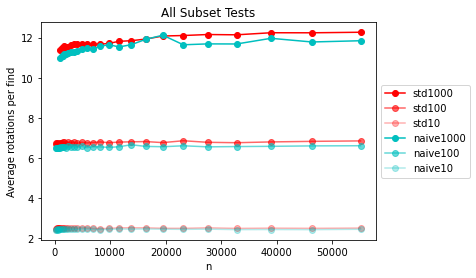

In [29]:
# TODO: process subset sizes into different data structures

# Plot subset tests
plt.plot(sub1000_std_n, sub1000_std_rot, marker='o', color='r', label=standard+"1000")
plt.plot(sub100_std_n, sub100_std_rot, marker='o', alpha=0.6, color='r', label=standard+"100")
plt.plot(sub10_std_n, sub10_std_rot, marker='o', alpha=0.3, color='r', label=standard+"10")

plt.plot(sub1000_n_n, sub1000_n_rot, marker='o', color='c', label=naive_v+"1000")
plt.plot(sub100_n_n, sub100_n_rot, marker='o', alpha=0.6, color='c', label=naive_v+"100")
plt.plot(sub10_n_n, sub10_n_rot, marker='o', alpha=0.3, color='c', label=naive_v+"10")

# Plot alltogether
plt.plot()
plt.title("All Subset Tests")
plt.xlabel("n")
plt.ylabel("Average rotations per find")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('SubsetGraph.png', bbox_inches='tight')

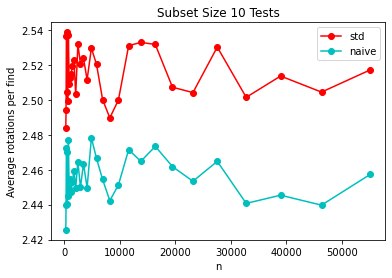

In [20]:
# 10 Subset
plt.plot()
plt.plot(sub10_std_n, sub10_std_rot, marker='o', color='r', label=standard)
plt.plot(sub10_n_n, sub10_n_rot, marker='o', color='c', label=naive_v)
plt.title("Subset Size 10 Tests")
plt.xlabel("n")
plt.ylabel("Average rotations per find")
plt.legend()

plt.savefig('10SubsetGraph.png', bbox_inches='tight')

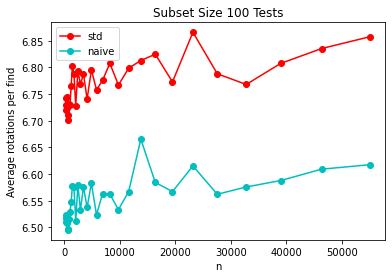

In [21]:
# 100 Subset

# 10 Subset
plt.plot()
plt.plot(sub100_std_n, sub100_std_rot, marker='o', color='r', label=standard)
plt.plot(sub100_n_n, sub100_n_rot, marker='o', color='c', label=naive_v)
plt.title("Subset Size 100 Tests")
plt.xlabel("n")
plt.ylabel("Average rotations per find")
plt.legend()

plt.savefig('100SubsetGraph.png', bbox_inches='tight')

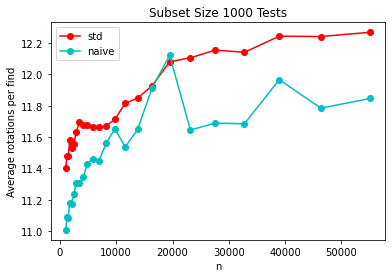

In [22]:
# 1000 Subset

# 10 Subset
plt.plot()
plt.plot(sub1000_std_n, sub1000_std_rot, marker='o', color='r', label=standard)
plt.plot(sub1000_n_n, sub1000_n_rot, marker='o', color='c', label=naive_v)
plt.title("Subset Size 1000 Tests")
plt.xlabel("n")
plt.ylabel("Average rotations per find")
plt.legend()

plt.savefig('1000SubsetGraph.png', bbox_inches='tight')